In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Reading in the latest dataset saved after we merged all the datasets

In [11]:
## reading in the dataset again
#dtypes={'date':np.str,'store_nbr':np.int64,'class':np.str,'family':np.str,'sum_unit_sales': np.float64,'no_items':np.float64,'no_perishable_items':np.float64,'items_onpromotion':np.float64,'dcoilwtico':np.float64,'city':np.str,'state':np.str,'type':np.str,'cluster':np.str,'transactions':np.float64,'description':np.str,'locale':np.str,'description_regional_hol':np.str,'locale_regional':np.str,'description_local_hol':np.str,'locale_local':np.str}
#parse_dates=['date']
class_merged_hol = pd.read_csv('class_merged_hol.csv', names=['date','store_nbr','class','family','sum_unit_sales','no_items','no_perishable_items','items_onpromotion','dcoilwtico','city','state','type','cluster','transactions','description','locale','description_regional_hol','locale_regional','description_local_hol','locale_local'],skiprows=1) # opens the csv file
print("Rows and columns:",class_merged_hol.shape)
pd.DataFrame.head(class_merged_hol)

C:\Users\laura.varsandan\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Rows and columns: (12794614, 20)


,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items,items_onpromotion,dcoilwtico,city,state,type,cluster,transactions,description,locale,description_regional_hol,locale_regional,description_local_hol,locale_local
0,2014-04-01,1,1002,GROCERY I,14.0,7.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-04-01,1,1003,GROCERY I,2.0,1.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-04-01,1,1004,GROCERY I,88.0,17.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-04-01,1,1006,GROCERY I,4.0,2.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-04-01,1,1008,GROCERY I,3.0,1.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
## Apply the column types again
class_merged_hol.dtypes

date                         object
store_nbr                     int64
class                         int64
family                       object
sum_unit_sales              float64
no_items                    float64
no_perishable_items         float64
items_onpromotion           float64
dcoilwtico                  float64
city                         object
state                        object
type                         object
cluster                       int64
transactions                float64
description                  object
locale                       object
description_regional_hol     object
locale_regional              object
description_local_hol        object
locale_local                 object
dtype: object

Change all the variables to the right data type, so that all categorical variables are strings and only the continous variables are left as float

In [14]:
class_merged_hol.date=class_merged_hol.date.astype(str)
class_merged_hol.date=pd.to_datetime(class_merged_hol.date)
class_merged_hol.store_nbr=class_merged_hol.store_nbr.astype(str)
class_merged_hol['class']=class_merged_hol['class'].astype(str)
class_merged_hol.family=class_merged_hol.family.astype(str)
class_merged_hol.city=class_merged_hol.city.astype(str)
class_merged_hol.state=class_merged_hol.state.astype(str)
class_merged_hol.type=class_merged_hol.type.astype(str)
class_merged_hol.cluster=class_merged_hol.cluster.astype(str)
class_merged_hol.description=class_merged_hol.description.astype(str)
class_merged_hol.locale=class_merged_hol.locale.astype(str)
class_merged_hol.description_regional_hol=class_merged_hol.description_regional_hol.astype(str)
class_merged_hol.locale_regional=class_merged_hol.locale_regional.astype(str)
class_merged_hol.description_local_hol=class_merged_hol.description_local_hol.astype(str)
class_merged_hol.locale_local=class_merged_hol.locale_local.astype(str)
class_merged_hol.dtypes

date                        datetime64[ns]
store_nbr                           object
class                               object
family                              object
sum_unit_sales                     float64
no_items                           float64
no_perishable_items                float64
items_onpromotion                  float64
dcoilwtico                         float64
city                                object
state                               object
type                                object
cluster                             object
transactions                       float64
description                         object
locale                              object
description_regional_hol            object
locale_regional                     object
description_local_hol               object
locale_local                        object
dtype: object

### Create the Target Variable

The target variable that we are trying to predict for next month is the volume of sales per product ranged for each class. This gives a level of normalisation between classes to compare and see which ones usually generate more sales. This will help us determine which classes to add in the optimisation step so that we maximize sales for each family of items (i.e. section). This will then dictage what % of space (in this case items ranged per store) should be allocated to each section. 

Therefore, let's create this target variable for each day-store-class combination.

In [15]:
class_merged_hol['sales_per_unit']=class_merged_hol.sum_unit_sales/class_merged_hol.no_items
pd.DataFrame.head(class_merged_hol)

,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items,items_onpromotion,dcoilwtico,city,...,type,cluster,transactions,description,locale,description_regional_hol,locale_regional,description_local_hol,locale_local,sales_per_unit
0,2014-04-01,1,1002,GROCERY I,14.0,7.0,0.0,0.0,99.69,Quito,...,D,13,1847.0,nan,nan,nan,nan,nan,nan,2.000000
1,2014-04-01,1,1003,GROCERY I,2.0,1.0,0.0,0.0,99.69,Quito,...,D,13,1847.0,nan,nan,nan,nan,nan,nan,2.000000
2,2014-04-01,1,1004,GROCERY I,88.0,17.0,0.0,0.0,99.69,Quito,...,D,13,1847.0,nan,nan,nan,nan,nan,nan,5.176471
3,2014-04-01,1,1006,GROCERY I,4.0,2.0,0.0,0.0,99.69,Quito,...,D,13,1847.0,nan,nan,nan,nan,nan,nan,2.000000
4,2014-04-01,1,1008,GROCERY I,3.0,1.0,0.0,0.0,99.69,Quito,...,D,13,1847.0,nan,nan,nan,nan,nan,nan,3.000000


## Create more meaningful Store Features
Sales for a particular class is likely to depend on the type of stores. The type of stores can vary depending on the demographic profile of that store, its size, and its location in a city. In our case, although we are given the cluster for each store and type for each store, we have not been given any information on what that those clusters or types mean, so they are hard to interpret. 

Therefore,for the purposes of this exercise, we are going to create our own clusters of stores per year which will group stores based on:
- how many products are ranged in each store 
- how many transactions they receive each
- what % of transactions occur during the weekdays ( versus what % of transactions occur during the weekend) - this can indicate whether they are being used as top-up shopping during the week or whether they are being used as weekly shopping during the weekend.
- their city coordinates - there might be shopping variations depending on each region and this will help approximate how close stores are between each other. 

In [17]:
# Get the relevant subset of data
group=class_merged_hol.groupby(['date','store_nbr','city','transactions'],as_index=False)
stores_features=pd.DataFrame(group['no_items'].agg('sum'))
pd.DataFrame.head(stores_features)

,date,store_nbr,city,transactions,no_items
0,2014-04-01,1,Quito,1847.0,1216.0
1,2014-04-01,10,Quito,1342.0,856.0
2,2014-04-01,11,Cayambe,2709.0,1163.0
3,2014-04-01,12,Latacunga,1292.0,829.0
4,2014-04-01,13,Latacunga,1091.0,815.0


In [18]:
stores_features['year']=stores_features['date'].dt.year
pd.DataFrame.head(stores_features)

,date,store_nbr,city,transactions,no_items,year
0,2014-04-01,1,Quito,1847.0,1216.0,2014
1,2014-04-01,10,Quito,1342.0,856.0,2014
2,2014-04-01,11,Cayambe,2709.0,1163.0,2014
3,2014-04-01,12,Latacunga,1292.0,829.0,2014
4,2014-04-01,13,Latacunga,1091.0,815.0,2014


#### 1) Number of Products Ranged Per Store-Year
This feature is a proxi for the capacity of the store. In order to get this at a year level, we will take the maximum of items ranged in any day during the year

In [19]:
group=stores_features.groupby(['store_nbr','year'],as_index=False)
no_items_per_store_year=pd.DataFrame(group['no_items'].agg('max'))
pd.DataFrame.head(no_items_per_store_year)

,store_nbr,year,no_items
0,1,2014,3144.0
1,1,2015,2058.0
2,1,2016,4148.0
3,1,2017,2295.0
4,10,2014,2334.0


In [25]:
no_items_per_store_year.dtypes

store_nbr     object
year           int64
no_items     float64
dtype: object

In [26]:
no_items_per_store_year['store-year']=no_items_per_store_year['store_nbr']+'-'+no_items_per_store_year['year'].astype(str)
pd.DataFrame.head(no_items_per_store_year)

,store_nbr,year,no_items,store-year
0,1,2014,3144.0,1-2014
1,1,2015,2058.0,1-2015
2,1,2016,4148.0,1-2016
3,1,2017,2295.0,1-2017
4,10,2014,2334.0,10-2014


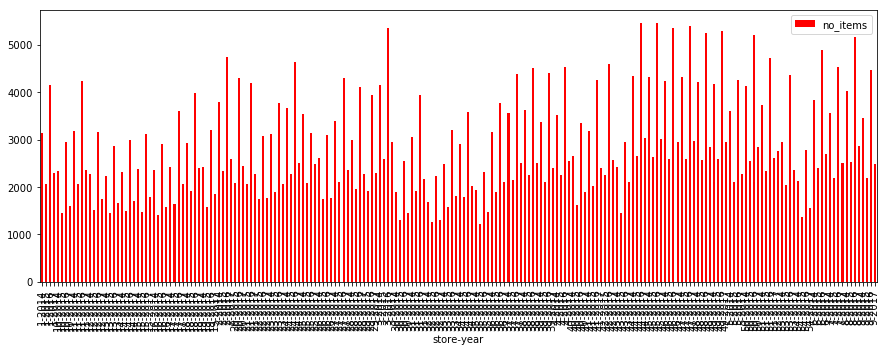

In [33]:
no_items_per_store_year.plot('store-year','no_items',kind='bar', color='r', figsize=(15,5))

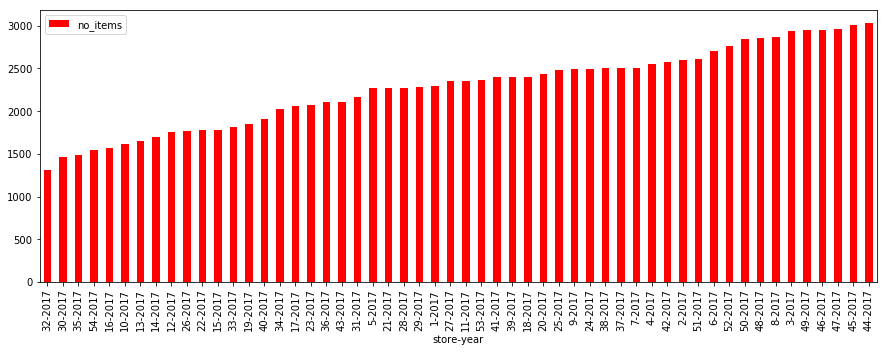

In [38]:
no_items_per_store_2017=no_items_per_store_year[no_items_per_store_year.year==2017]
no_items_per_store_2017=no_items_per_store_2017.sort_values(by='no_items')
no_items_per_store_2017.plot('store-year','no_items',kind='bar', color='r', figsize=(15,5))

We can see that there is quite a lot of variance in the number of items, so this could be a useful feature. 

#### 2) Number of Transactions Per Store_Year

In [39]:
group=stores_features.groupby(['store_nbr','year'],as_index=False)
transactions_per_store_year=pd.DataFrame(group['transactions'].agg('sum'))
pd.DataFrame.head(transactions_per_store_year)

,store_nbr,year,transactions
0,1,2014,422777.0
1,1,2015,558606.0
2,1,2016,544262.0
3,1,2017,339992.0
4,10,2014,290499.0


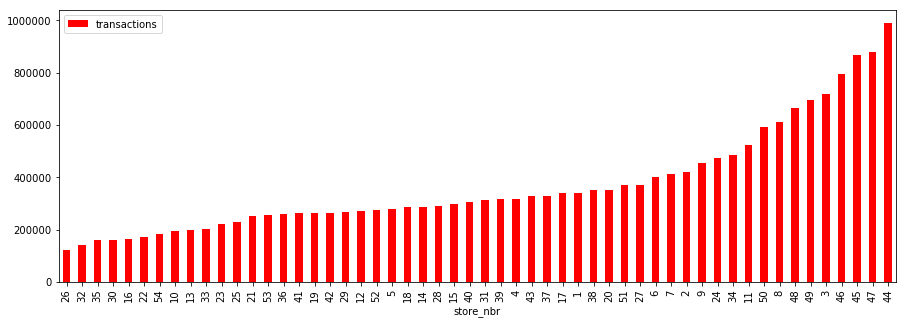

In [40]:
transactions_per_store_2017=transactions_per_store_year[transactions_per_store_year.year==2017]
transactions_per_store_2017=transactions_per_store_2017.sort_values(by='transactions')
transactions_per_store_2017.plot('store_nbr','transactions',kind='bar', color='r', figsize=(15,5))

This is interesting. There is a lot more variation at the top end for the number of transactions between stores than in the number of ranged items. In any case, this is also a useful feature as the variation is even larger. 

#### 3) % of Transactions happening on a Weekend

In [42]:
stores_features['weekday']=stores_features['date'].apply(lambda x: x.weekday())
pd.DataFrame.head(stores_features)

,date,store_nbr,city,transactions,no_items,year,weekday
0,2014-04-01,1,Quito,1847.0,1216.0,2014,1
1,2014-04-01,10,Quito,1342.0,856.0,2014,1
2,2014-04-01,11,Cayambe,2709.0,1163.0,2014,1
3,2014-04-01,12,Latacunga,1292.0,829.0,2014,1
4,2014-04-01,13,Latacunga,1091.0,815.0,2014,1


In [46]:
stores_features['is_weekday']=np.where(stores_features.weekday<5,1,0)
pd.DataFrame.head(stores_features)

,date,store_nbr,city,transactions,no_items,year,weekday,is_weekday
0,2014-04-01,1,Quito,1847.0,1216.0,2014,1,1
1,2014-04-01,10,Quito,1342.0,856.0,2014,1,1
2,2014-04-01,11,Cayambe,2709.0,1163.0,2014,1,1
3,2014-04-01,12,Latacunga,1292.0,829.0,2014,1,1
4,2014-04-01,13,Latacunga,1091.0,815.0,2014,1,1


In [47]:
group=stores_features.groupby(['store_nbr','year','is_weekday'],as_index=False)
transactions_per_store_year_daytype=pd.DataFrame(group['transactions'].agg('sum'))
pd.DataFrame.head(transactions_per_store_year_daytype)

,store_nbr,year,is_weekday,transactions
0,1,2014,0,69994.0
1,1,2014,1,352783.0
2,1,2015,0,94917.0
3,1,2015,1,463689.0
4,1,2016,0,94379.0


In [48]:
# Join the total transactions to get the % on WeekEnd
transactions_per_store_year_daytype=pd.merge(transactions_per_store_year_daytype,transactions_per_store_year, on=['year','store_nbr'],how='left')
pd.DataFrame.head(transactions_per_store_year_daytype)

,store_nbr,year,is_weekday,transactions_x,transactions_y
0,1,2014,0,69994.0,422777.0
1,1,2014,1,352783.0,422777.0
2,1,2015,0,94917.0,558606.0
3,1,2015,1,463689.0,558606.0
4,1,2016,0,94379.0,544262.0


In [50]:
transactions_per_store_year_weekend=transactions_per_store_year_daytype[transactions_per_store_year_daytype.is_weekday==0]
pd.DataFrame.head(transactions_per_store_year_weekend)

,store_nbr,year,is_weekday,transactions_x,transactions_y
0,1,2014,0,69994.0,422777.0
2,1,2015,0,94917.0,558606.0
4,1,2016,0,94379.0,544262.0
6,1,2017,0,58780.0,339992.0
8,10,2014,0,89560.0,290499.0


In [51]:
transactions_per_store_year_weekend['tran_on_wknd']=transactions_per_store_year_weekend['transactions_x']/transactions_per_store_year_weekend['transactions_y']
pd.DataFrame.head(transactions_per_store_year_weekend)

C:\Users\laura.varsandan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,store_nbr,year,is_weekday,transactions_x,transactions_y,tran_on_wknd
0,1,2014,0,69994.0,422777.0,0.165558
2,1,2015,0,94917.0,558606.0,0.169918
4,1,2016,0,94379.0,544262.0,0.173407
6,1,2017,0,58780.0,339992.0,0.172886
8,10,2014,0,89560.0,290499.0,0.308297


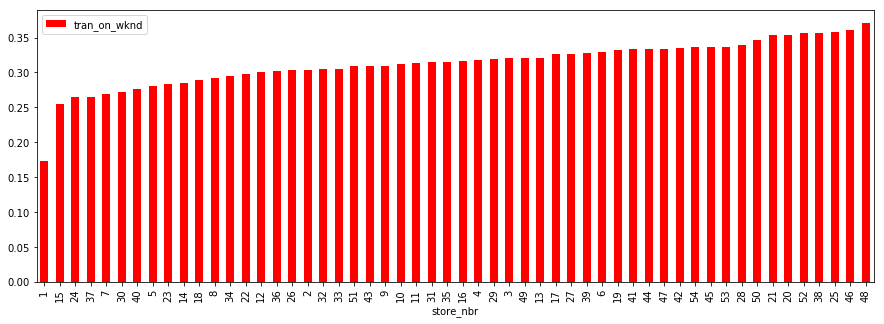

In [52]:
transactions_per_store_year_weekend_2017=transactions_per_store_year_weekend[transactions_per_store_year_weekend.year==2017]
transactions_per_store_year_weekend_2017=transactions_per_store_year_weekend_2017.sort_values(by='tran_on_wknd')
transactions_per_store_year_weekend_2017.plot('store_nbr','tran_on_wknd',kind='bar', color='r', figsize=(15,5))

Apart from only one store, the variation in the % of transactions on weekend is not that high between stores. There is still some variation, so we will let it in and decide later what to do with it. 

#### 4) Lat and Logitude for each City

In [54]:
#get the unique list of cities
cities=pd.DataFrame(class_merged_hol['city'].unique())
print(cities)

                0
0           Quito
1   Santo Domingo
2         Cayambe
3       Latacunga
4        Riobamba
5          Ibarra
6        Guaranda
7          Ambato
8       Guayaquil
9         Salinas
10          Daule
11       Babahoyo
12        Quevedo
13         Playas
14       Libertad
15         Cuenca
16           Loja
17        Machala
18     Esmeraldas
19      El Carmen
20          Manta
21           Puyo


I have searched for these online and took a lat-long pair of coordinates for each city that looked like the centre of the city. Let's read in that data. 

In [55]:
dtypes={'city': np.str,'lat':np.float64,'long':np.float64}
city_lat_long = pd.read_csv('city_lat_long.csv',dtype=dtypes) # opens the csv file
print("Rows and columns:",city_lat_long.shape)
pd.DataFrame.head(city_lat_long)

Rows and columns: (22, 3)


,City,Lat,Long
0,Quito,-0.173986,-78.469864
1,Santo Domingo,-0.250281,-79.170743
2,Cayambe,0.039332,-78.145870
3,Latacunga,-0.932321,-78.617025
4,Riobamba,-1.662650,-78.654020


In [72]:
city_lat_long.columns=['city','lat','long']
pd.DataFrame.head(city_lat_long)

,city,lat,long
0,Quito,-0.173986,-78.469864
1,Santo Domingo,-0.250281,-79.170743
2,Cayambe,0.039332,-78.145870
3,Latacunga,-0.932321,-78.617025
4,Riobamba,-1.662650,-78.654020


In [65]:
store_city=class_merged_hol[['store_nbr','city']]
pd.DataFrame.head(store_city)

,store_nbr,city
0,1,Quito
1,1,Quito
2,1,Quito
3,1,Quito
4,1,Quito


In [67]:
store_city=store_city.drop_duplicates()
pd.DataFrame.head(store_city)

,store_nbr,city
0,1,Quito
164,2,Quito
332,3,Quito
505,4,Quito
674,5,Santo Domingo


In [73]:
store_city = pd.merge(store_city,city_lat_long, on=['city'],how='left')
pd.DataFrame.head(store_city)

,store_nbr,city,lat,long
0,1,Quito,-0.173986,-78.469864
1,2,Quito,-0.173986,-78.469864
2,3,Quito,-0.173986,-78.469864
3,4,Quito,-0.173986,-78.469864
4,5,Santo Domingo,-0.250281,-79.170743


In [61]:
#### Merge all the store features together
store_features_year = pd.merge(no_items_per_store_year,transactions_per_store_year, on=['year','store_nbr'],how='left')
pd.DataFrame.head(store_features_year)

,store_nbr,year,no_items,store-year,transactions
0,1,2014,3144.0,1-2014,422777.0
1,1,2015,2058.0,1-2015,558606.0
2,1,2016,4148.0,1-2016,544262.0
3,1,2017,2295.0,1-2017,339992.0
4,10,2014,2334.0,10-2014,290499.0


In [62]:
store_features_year = pd.merge(store_features_year,transactions_per_store_year_weekend, on=['year','store_nbr'],how='left')
pd.DataFrame.head(store_features_year)

,store_nbr,year,no_items,store-year,transactions,is_weekday,transactions_x,transactions_y,tran_on_wknd
0,1,2014,3144.0,1-2014,422777.0,0,69994.0,422777.0,0.165558
1,1,2015,2058.0,1-2015,558606.0,0,94917.0,558606.0,0.169918
2,1,2016,4148.0,1-2016,544262.0,0,94379.0,544262.0,0.173407
3,1,2017,2295.0,1-2017,339992.0,0,58780.0,339992.0,0.172886
4,10,2014,2334.0,10-2014,290499.0,0,89560.0,290499.0,0.308297


In [74]:
store_features_year = pd.merge(store_features_year,store_city, on=['store_nbr'],how='left')
pd.DataFrame.head(store_features_year)

,store_nbr,year,no_items,store-year,transactions,is_weekday,transactions_x,transactions_y,tran_on_wknd,city,lat,long
0,1,2014,3144.0,1-2014,422777.0,0,69994.0,422777.0,0.165558,Quito,-0.173986,-78.469864
1,1,2015,2058.0,1-2015,558606.0,0,94917.0,558606.0,0.169918,Quito,-0.173986,-78.469864
2,1,2016,4148.0,1-2016,544262.0,0,94379.0,544262.0,0.173407,Quito,-0.173986,-78.469864
3,1,2017,2295.0,1-2017,339992.0,0,58780.0,339992.0,0.172886,Quito,-0.173986,-78.469864
4,10,2014,2334.0,10-2014,290499.0,0,89560.0,290499.0,0.308297,Quito,-0.173986,-78.469864


In [77]:
#remove unwanted columns 
store_features_year.drop(['store-year', 'transactions_x','transactions_y', 'city'],axis=1,inplace=True)
pd.DataFrame.head(store_features_year)

,store_nbr,year,no_items,transactions,is_weekday,tran_on_wknd,lat,long
0,1,2014,3144.0,422777.0,0,0.165558,-0.173986,-78.469864
1,1,2015,2058.0,558606.0,0,0.169918,-0.173986,-78.469864
2,1,2016,4148.0,544262.0,0,0.173407,-0.173986,-78.469864
3,1,2017,2295.0,339992.0,0,0.172886,-0.173986,-78.469864
4,10,2014,2334.0,290499.0,0,0.308297,-0.173986,-78.469864


In [78]:
#save results
store_features_year.to_csv('store_features_year.csv',sep=',')

## Create Wage Features

On the Kaggle competition website, the following information is given: 
"Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this"

In order to take this into account, we are going to create a field called is_wage_day. Since the effect of wages are likely going to last a few days, we are going to create a descending flag to 0 for the 7 days after a wage day.

In [86]:
#Create a data frame with all unique days in our dataset.
days=pd.DataFrame(class_merged_hol['date'].unique())
pd.DataFrame.head(days)

,0
0,2014-04-01
1,2014-04-02
2,2014-04-03
3,2014-04-04
4,2014-04-05


In [87]:
days.columns=['date']
days['day_of_month']=days['date'].dt.day
pd.DataFrame.head(days)

,date,day_of_month
0,2014-04-01,1
1,2014-04-02,2
2,2014-04-03,3
3,2014-04-04,4
4,2014-04-05,5


In [88]:
days['is_wage_day']=np.where(days.day_of_month==15,1,0)
pd.DataFrame.head(days)

,date,day_of_month,is_wage_day
0,2014-04-01,1,0
1,2014-04-02,2,0
2,2014-04-03,3,0
3,2014-04-04,4,0
4,2014-04-05,5,0


In [91]:
days['last_day_of_month']=days['date'].dt.to_period('M')
pd.DataFrame.head(days)

,date,day_of_month,is_wage_day,last_day_of_month
0,2014-04-01,1,0,2014-04
1,2014-04-02,2,0,2014-04
2,2014-04-03,3,0,2014-04
3,2014-04-04,4,0,2014-04
4,2014-04-05,5,0,2014-04


In [93]:
days['last_day_of_month']=days['last_day_of_month'].dt.to_timestamp('M')

AttributeError: 'DatetimeProperties' object has no attribute 'to_timestamp'

In [94]:
days['last_day_of_month']=days['last_day_of_month'].dt.day
pd.DataFrame.head(days)

,date,day_of_month,is_wage_day,last_day_of_month
0,2014-04-01,1,0,30
1,2014-04-02,2,0,30
2,2014-04-03,3,0,30
3,2014-04-04,4,0,30
4,2014-04-05,5,0,30


In [95]:
days['is_wage_day_last_day']=np.where(days.day_of_month==days.last_day_of_month,1,0)
pd.DataFrame.head(days)

,date,day_of_month,is_wage_day,last_day_of_month,is_wage_day_last_day
0,2014-04-01,1,0,30,0
1,2014-04-02,2,0,30,0
2,2014-04-03,3,0,30,0
3,2014-04-04,4,0,30,0
4,2014-04-05,5,0,30,0


In [96]:
days['is_wage_day']=days['is_wage_day']+days['is_wage_day_last_day']
pd.DataFrame.head(days)

,date,day_of_month,is_wage_day,last_day_of_month,is_wage_day_last_day
0,2014-04-01,1,0,30,0
1,2014-04-02,2,0,30,0
2,2014-04-03,3,0,30,0
3,2014-04-04,4,0,30,0
4,2014-04-05,5,0,30,0


Now we need to add the wage factor for the days following wage days.

In [108]:
range(days['date'].count())
days.iloc[0,3]

30

In [127]:
days['wage_factor']=0
for i in range(days['date'].count()):
        if days.iloc[i,1]-15<=7 and days.iloc[i,1]-15>0 :
            days.iloc[i,5]=1/7*(7-(days.iloc[i,1]-15))
        if days.iloc[i,1]<=7:
            days.iloc[i,5]=1/7*(7-days.iloc[i,1])

In [129]:
pd.DataFrame.head(days)

,date,day_of_month,is_wage_day,last_day_of_month,is_wage_day_last_day,wage_factor
0,2014-04-01,1,0,30,0,0.857143
1,2014-04-02,2,0,30,0,0.714286
2,2014-04-03,3,0,30,0,0.571429
3,2014-04-04,4,0,30,0,0.428571
4,2014-04-05,5,0,30,0,0.285714


In [130]:
days.iloc[:31]

,date,day_of_month,is_wage_day,last_day_of_month,is_wage_day_last_day,wage_factor
0,2014-04-01,1,0,30,0,0.857143
1,2014-04-02,2,0,30,0,0.714286
2,2014-04-03,3,0,30,0,0.571429
3,2014-04-04,4,0,30,0,0.428571
4,2014-04-05,5,0,30,0,0.285714
5,2014-04-06,6,0,30,0,0.142857
6,2014-04-07,7,0,30,0,0.000000
7,2014-04-08,8,0,30,0,0.000000
8,2014-04-09,9,0,30,0,0.000000
9,2014-04-10,10,0,30,0,0.000000


In [132]:
days['wage_factor']=days['is_wage_day']+days['wage_factor']
pd.DataFrame.head(days)

,date,day_of_month,is_wage_day,last_day_of_month,is_wage_day_last_day,wage_factor
0,2014-04-01,1,0,30,0,0.857143
1,2014-04-02,2,0,30,0,0.714286
2,2014-04-03,3,0,30,0,0.571429
3,2014-04-04,4,0,30,0,0.428571
4,2014-04-05,5,0,30,0,0.285714


In [135]:
wage_days=days[['date','day_of_month','wage_factor']]
pd.DataFrame.head(wage_days)

,date,day_of_month,wage_factor
0,2014-04-01,1,0.857143
1,2014-04-02,2,0.714286
2,2014-04-03,3,0.571429
3,2014-04-04,4,0.428571
4,2014-04-05,5,0.285714


In [136]:
#save the results
wage_days.to_csv('wage_days.csv',sep=',')

## Create the holiday factor

Similar to the wage factor, the holiday factor should have an increasing factor up to 7 days before a holiday date. Each holiday type (local, regional,national) will have its own factor as they are likely to have different impacts. 

Let's check if on the days of national holidays the stores are actually closed and therefore have less transactions than normal, in which case the factor will be 0. 

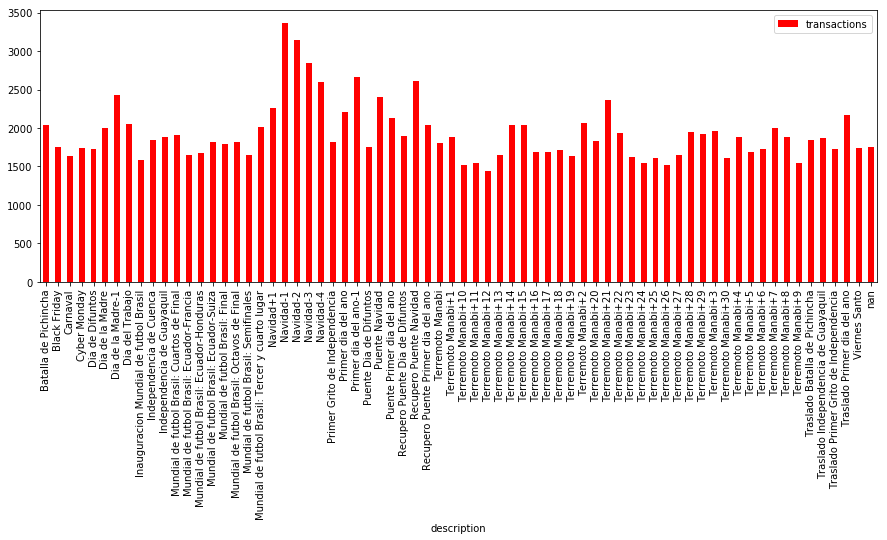

In [280]:
group=class_merged_hol.groupby(['description'],as_index=False)
holiday_transactions=pd.DataFrame(group['transactions'].agg('mean'))
pd.DataFrame.head(holiday_transactions)
holiday_transactions.plot('description','transactions',kind='bar', color='r', figsize=(15,5))

It doesn't look like the stores are closed on National holidays. On the contrary, their sales are likely to be equal or even exceeed normal store sales. To the holiday factor on the actuall holiday days will be kept as 1. 

In [552]:
# get the holiday data
holidays=class_merged_hol[['date','store_nbr','description','locale','description_regional_hol', 'locale_regional','description_local_hol', 'locale_local']]
holidays=holidays.drop_duplicates()
pd.DataFrame.head(holidays)

,date,store_nbr,description,locale,description_regional_hol,locale_regional,description_local_hol,locale_local
0,2014-04-01,1,nan,nan,nan,nan,nan,nan
164,2014-04-01,2,nan,nan,nan,nan,nan,nan
332,2014-04-01,3,nan,nan,nan,nan,nan,nan
505,2014-04-01,4,nan,nan,nan,nan,nan,nan
674,2014-04-01,5,nan,nan,nan,nan,nan,nan


#### 1) The National Holiday Factor

In [553]:
holidays['locale'].value_counts(normalize=True,dropna=False)

nan         0.906511
National    0.093489
Name: locale, dtype: float64

In [554]:
holidays['nat_hol_fctr']=np.where(holidays.description!="nan",1,0)
holidays['nat_hol_fctr_w']=0
pd.DataFrame.head(holidays)

,date,store_nbr,description,locale,description_regional_hol,locale_regional,description_local_hol,locale_local,nat_hol_fctr,nat_hol_fctr_w
0,2014-04-01,1,nan,nan,nan,nan,nan,nan,0,0
164,2014-04-01,2,nan,nan,nan,nan,nan,nan,0,0
332,2014-04-01,3,nan,nan,nan,nan,nan,nan,0,0
505,2014-04-01,4,nan,nan,nan,nan,nan,nan,0,0
674,2014-04-01,5,nan,nan,nan,nan,nan,nan,0,0


In [555]:
sum(holidays.nat_hol_fctr)

5864

Now we need to apply a weighted factor on the days leading up to a holiday. We will use the same method as for wages. 

In [556]:
holidays['nat_hol_date']=np.where(holidays.description!="nan",holidays.date,None)
pd.DataFrame.head(holidays)

,date,store_nbr,description,locale,description_regional_hol,locale_regional,description_local_hol,locale_local,nat_hol_fctr,nat_hol_fctr_w,nat_hol_date
0,2014-04-01,1,nan,nan,nan,nan,nan,nan,0,0,None
164,2014-04-01,2,nan,nan,nan,nan,nan,nan,0,0,None
332,2014-04-01,3,nan,nan,nan,nan,nan,nan,0,0,None
505,2014-04-01,4,nan,nan,nan,nan,nan,nan,0,0,None
674,2014-04-01,5,nan,nan,nan,nan,nan,nan,0,0,None


In [557]:
holidays.nat_hol_date=pd.to_datetime(holidays.nat_hol_date)
holidays.date=pd.to_datetime(holidays.date)

In [558]:
holidays.nat_hol_date=holidays.nat_hol_date.values.astype('datetime64[D]')
holidays.date=holidays.date.values.astype('datetime64[D]')

In [559]:
holidays.dtypes

date                        datetime64[ns]
store_nbr                           object
description                         object
locale                              object
description_regional_hol            object
locale_regional                     object
description_local_hol               object
locale_local                        object
nat_hol_fctr                         int32
nat_hol_fctr_w                       int64
nat_hol_date                datetime64[ns]
dtype: object

In [560]:
nat_hol_dates=holidays['nat_hol_date'].values.astype('datetime64[D]')
dates=holidays['date'].values.astype('datetime64[D]')

In [561]:
nat_hol_dates=np.unique(nat_hol_dates)
print(nat_hol_dates)

['NaT' '2014-04-18' '2014-05-01' '2014-05-10' '2014-05-11' '2014-05-24'
 '2014-06-12' '2014-06-15' '2014-06-20' '2014-06-25' '2014-06-28'
 '2014-06-29' '2014-06-30' '2014-07-01' '2014-07-04' '2014-07-05'
 '2014-07-08' '2014-07-09' '2014-07-12' '2014-07-13' '2014-08-10'
 '2014-10-10' '2014-11-02' '2014-11-03' '2014-11-28' '2014-12-01'
 '2014-12-20' '2014-12-21' '2014-12-22' '2014-12-23' '2014-12-24'
 '2014-12-26' '2014-12-31' '2015-01-01' '2015-01-02' '2015-01-10'
 '2015-02-16' '2015-02-17' '2015-04-03' '2015-05-01' '2015-05-09'
 '2015-05-10' '2015-05-24' '2015-08-10' '2015-10-09' '2015-11-02'
 '2015-11-03' '2015-11-27' '2015-11-30' '2015-12-21' '2015-12-22'
 '2015-12-23' '2015-12-24' '2015-12-26' '2015-12-31' '2016-01-01'
 '2016-02-08' '2016-02-09' '2016-03-25' '2016-04-16' '2016-04-17'
 '2016-04-18' '2016-04-19' '2016-04-20' '2016-04-21' '2016-04-22'
 '2016-04-23' '2016-04-24' '2016-04-25' '2016-04-26' '2016-04-27'
 '2016-04-28' '2016-04-29' '2016-04-30' '2016-05-01' '2016-05-02'
 '20

C:\Users\laura.varsandan\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:216: FutureWarning: In the future, NAT != NAT will be True rather than False.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [562]:
#checking that the computations are happening as they should be
print(nat_hol_dates[1])
print(dates[1])
print((nat_hol_dates[1]-dates[1])/np.timedelta64(1,'D'))

2014-04-18
2014-04-01
17.0


In [563]:
range(len(nat_hol_dates)-1,0,-1)

range(113, 0, -1)

In [564]:
nat_hol_dates[113]

numpy.datetime64('2017-08-11')

In [565]:
for i in range(len(dates)):
    for y in range(len(nat_hol_dates)-1,0,-1):
        if 0<((nat_hol_dates[y]-dates[i])/np.timedelta64(1,'D'))<=7:
            holidays.iloc[i,9]=1/7*(7-((nat_hol_dates[y]-dates[i])/np.timedelta64(1,'D')))

In [566]:
pd.DataFrame.head(holidays)

,date,store_nbr,description,locale,description_regional_hol,locale_regional,description_local_hol,locale_local,nat_hol_fctr,nat_hol_fctr_w,nat_hol_date
0,2014-04-01,1,nan,nan,nan,nan,nan,nan,0,0.0,NaT
164,2014-04-01,2,nan,nan,nan,nan,nan,nan,0,0.0,NaT
332,2014-04-01,3,nan,nan,nan,nan,nan,nan,0,0.0,NaT
505,2014-04-01,4,nan,nan,nan,nan,nan,nan,0,0.0,NaT
674,2014-04-01,5,nan,nan,nan,nan,nan,nan,0,0.0,NaT


In [567]:
holidays['nat_hol_fctr_w'].value_counts(normalize=True,dropna=False)

0.000000    0.728286
0.857143    0.090253
0.714286    0.043269
0.571429    0.039969
0.285714    0.034580
0.428571    0.033783
0.142857    0.029861
Name: nat_hol_fctr_w, dtype: float64

In [568]:
holidays['nat_hol_fctr']=holidays['nat_hol_fctr']+holidays['nat_hol_fctr_w']

In [569]:
store_1=holidays[holidays.store_nbr=='1']
# Check that it makes sense for the Christmas period which is probably the most complicated
store_1[250:280]

,date,store_nbr,description,locale,description_regional_hol,locale_regional,description_local_hol,locale_local,nat_hol_fctr,nat_hol_fctr_w,nat_hol_date
2070383,2014-12-07,1,nan,nan,nan,nan,nan,nan,0.000000,0.000000,NaT
2080054,2014-12-08,1,nan,nan,nan,nan,nan,nan,0.000000,0.000000,NaT
2089584,2014-12-09,1,nan,nan,nan,nan,nan,nan,0.000000,0.000000,NaT
2099111,2014-12-10,1,nan,nan,nan,nan,nan,nan,0.000000,0.000000,NaT
2108634,2014-12-11,1,nan,nan,nan,nan,nan,nan,0.000000,0.000000,NaT
2118154,2014-12-12,1,nan,nan,nan,nan,nan,nan,0.000000,0.000000,NaT
2127767,2014-12-13,1,nan,nan,nan,nan,nan,nan,0.000000,0.000000,NaT
2137740,2014-12-14,1,nan,nan,nan,nan,nan,nan,0.142857,0.142857,NaT
2147473,2014-12-15,1,nan,nan,nan,nan,nan,nan,0.285714,0.285714,NaT
2157239,2014-12-16,1,nan,nan,nan,nan,nan,nan,0.428571,0.428571,NaT


In [570]:
#Visualize how these factors look like over a year. 
holidays['day_of_year']=holidays.date.dt.dayofyear
pd.DataFrame.head(holidays)

,date,store_nbr,description,locale,description_regional_hol,locale_regional,description_local_hol,locale_local,nat_hol_fctr,nat_hol_fctr_w,nat_hol_date,day_of_year
0,2014-04-01,1,nan,nan,nan,nan,nan,nan,0.0,0.0,NaT,91
164,2014-04-01,2,nan,nan,nan,nan,nan,nan,0.0,0.0,NaT,91
332,2014-04-01,3,nan,nan,nan,nan,nan,nan,0.0,0.0,NaT,91
505,2014-04-01,4,nan,nan,nan,nan,nan,nan,0.0,0.0,NaT,91
674,2014-04-01,5,nan,nan,nan,nan,nan,nan,0.0,0.0,NaT,91


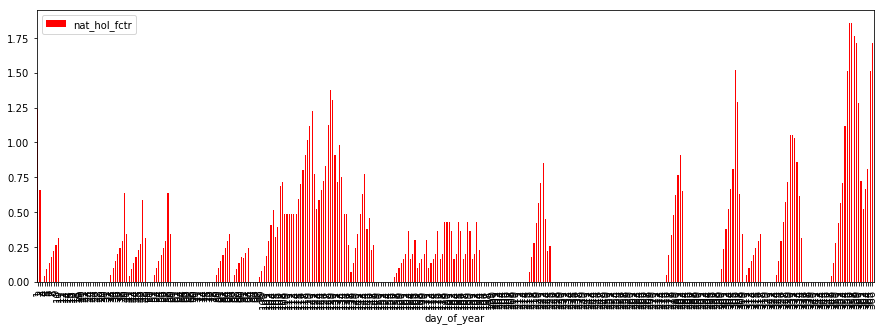

In [571]:
group=holidays.groupby(['day_of_year'],as_index=False)
nat_hol_factor_viz=pd.DataFrame(group['nat_hol_fctr'].agg('mean'))
nat_hol_factor_viz=nat_hol_factor_viz.sort_values(by='day_of_year')
pd.DataFrame.head(nat_hol_factor_viz)
nat_hol_factor_viz.plot('day_of_year','nat_hol_fctr',kind='bar', color='r', figsize=(15,5))

#### 2) Regional Holidays

Regional and Local Holidays are a bit trickier as they only apply to certain stores so we cannot work purely on the dates. We need to adjust the approach in order to take into account the stores as well. 

In [572]:
holidays['reg_hol_fctr']=np.where(holidays.description_regional_hol!="nan",1,0)
holidays['reg_hol_fctr_w']=0
holidays.reg_hol_fctr_w=holidays.reg_hol_fctr_w.values.astype('float64')
holidays['reg_hol_date']=np.where(holidays.description_regional_hol!="nan",holidays.date,None)
holidays.reg_hol_date=pd.to_datetime(holidays.reg_hol_date)
holidays.reg_hol_date=holidays.reg_hol_date.values.astype('datetime64[D]')
pd.DataFrame.head(holidays)

,date,store_nbr,description,locale,description_regional_hol,locale_regional,description_local_hol,locale_local,nat_hol_fctr,nat_hol_fctr_w,nat_hol_date,day_of_year,reg_hol_fctr,reg_hol_fctr_w,reg_hol_date
0,2014-04-01,1,nan,nan,nan,nan,nan,nan,0.0,0.0,NaT,91,0,0.0,NaT
164,2014-04-01,2,nan,nan,nan,nan,nan,nan,0.0,0.0,NaT,91,0,0.0,NaT
332,2014-04-01,3,nan,nan,nan,nan,nan,nan,0.0,0.0,NaT,91,0,0.0,NaT
505,2014-04-01,4,nan,nan,nan,nan,nan,nan,0.0,0.0,NaT,91,0,0.0,NaT
674,2014-04-01,5,nan,nan,nan,nan,nan,nan,0.0,0.0,NaT,91,0,0.0,NaT


In [573]:
#get the list of stores that have regional holidays
reg_hol_stores=holidays[holidays.description_regional_hol!='nan']['store_nbr'].unique()
print(reg_hol_stores)

['12' '13' '15' '5' '16' '25' '21']


In [574]:
holidays[holidays.store_nbr=='12']

,date,store_nbr,description,locale,description_regional_hol,locale_regional,description_local_hol,locale_local,nat_hol_fctr,nat_hol_fctr_w,nat_hol_date,day_of_year,reg_hol_fctr,reg_hol_fctr_w,reg_hol_date
1798,2014-04-01,12,nan,nan,Provincializacion de Cotopaxi,Regional,nan,nan,0.000000,0.000000,NaT,91,1,0.0,2014-04-01
8992,2014-04-02,12,nan,nan,nan,nan,nan,nan,0.000000,0.000000,NaT,92,0,0.0,NaT
16118,2014-04-03,12,nan,nan,nan,nan,nan,nan,0.000000,0.000000,NaT,93,0,0.0,NaT
23248,2014-04-04,12,nan,nan,nan,nan,nan,nan,0.000000,0.000000,NaT,94,0,0.0,NaT
30452,2014-04-05,12,nan,nan,nan,nan,nan,nan,0.000000,0.000000,NaT,95,0,0.0,NaT
37750,2014-04-06,12,nan,nan,nan,nan,nan,nan,0.000000,0.000000,NaT,96,0,0.0,NaT
44869,2014-04-07,12,nan,nan,nan,nan,nan,nan,0.000000,0.000000,NaT,97,0,0.0,NaT
51951,2014-04-08,12,nan,nan,nan,nan,nan,nan,0.000000,0.000000,NaT,98,0,0.0,NaT
59015,2014-04-09,12,nan,nan,nan,nan,nan,nan,0.000000,0.000000,NaT,99,0,0.0,NaT
66062,2014-04-10,12,nan,nan,nan,nan,nan,nan,0.000000,0.000000,NaT,100,0,0.0,NaT


In [575]:
for s in reg_hol_stores:
    reg_hol_store=holidays[holidays.store_nbr==s]
    
    reg_hol_dates=reg_hol_store['reg_hol_date'].values.astype('datetime64[D]')
    
    reg_hol_dates=np.unique(reg_hol_dates)
    
    dates=reg_hol_store['date'].values.astype('datetime64[D]')
    
    for i in range(len(dates)):
        for y in range(len(reg_hol_dates)-1,0,-1):
            if 0<((reg_hol_dates[y]-dates[i])/np.timedelta64(1,'D'))<=7:
                #holidays[(holidays.store_nbr=='12')].iloc[i,13]=1/7*(7-((reg_hol_dates[y]-dates[i])/np.timedelta64(1,'D')))
                reg_hol_store.iloc[i,13]=1/7*(7-((reg_hol_dates[y]-dates[i])/np.timedelta64(1,'D')))
                idx=holidays[(holidays.store_nbr==s)].iloc[i].name
                holidays.loc[idx]=reg_hol_store.iloc[i]

C:\Users\laura.varsandan\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:216: FutureWarning: In the future, NAT != NAT will be True rather than False.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
C:\Users\laura.varsandan\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [576]:
print(holidays['reg_hol_fctr_w'].value_counts(normalize=True,dropna=False))
print(reg_hol_store['reg_hol_fctr_w'].value_counts(normalize=True,dropna=False))

0.000000    0.998087
0.857143    0.000319
0.428571    0.000319
0.571429    0.000319
0.714286    0.000319
0.285714    0.000319
0.142857    0.000319
Name: reg_hol_fctr_w, dtype: float64
0.000000    0.984064
0.428571    0.002656
0.571429    0.002656
0.857143    0.002656
0.142857    0.002656
0.714286    0.002656
0.285714    0.002656
Name: reg_hol_fctr_w, dtype: float64


In [577]:
holidays[(holidays['reg_hol_fctr_w']>0)]

,date,store_nbr,description,locale,description_regional_hol,locale_regional,description_local_hol,locale_local,nat_hol_fctr,nat_hol_fctr_w,nat_hol_date,day_of_year,reg_hol_fctr,reg_hol_fctr_w,reg_hol_date
559317,2014-06-19,15,nan,nan,nan,nan,nan,nan,0.857143,0.857143,NaT,170,0,0.142857,NaT
566416,2014-06-20,15,Mundial de futbol Brasil: Ecuador-Honduras,National,nan,nan,nan,nan,1.285714,0.285714,2014-06-20,171,0,0.285714,NaT
573538,2014-06-21,15,nan,nan,nan,nan,nan,nan,0.428571,0.428571,NaT,172,0,0.428571,NaT
580838,2014-06-22,15,nan,nan,nan,nan,nan,nan,0.571429,0.571429,NaT,173,0,0.571429,NaT
588035,2014-06-23,15,nan,nan,nan,nan,nan,nan,0.714286,0.714286,NaT,174,0,0.714286,NaT
595150,2014-06-24,15,nan,nan,nan,nan,nan,nan,0.857143,0.857143,NaT,175,0,0.857143,NaT
1720848,2014-10-31,5,nan,nan,nan,nan,nan,nan,0.714286,0.714286,NaT,304,0,0.142857,NaT
1722937,2014-10-31,16,nan,nan,nan,nan,nan,nan,0.714286,0.714286,NaT,304,0,0.142857,NaT
1730213,2014-11-01,5,nan,nan,nan,nan,nan,nan,0.857143,0.857143,NaT,305,0,0.285714,NaT
1732401,2014-11-01,16,nan,nan,nan,nan,nan,nan,0.857143,0.857143,NaT,305,0,0.285714,NaT


In [578]:
holidays['reg_hol_fctr']=holidays['reg_hol_fctr']+holidays['reg_hol_fctr_w']

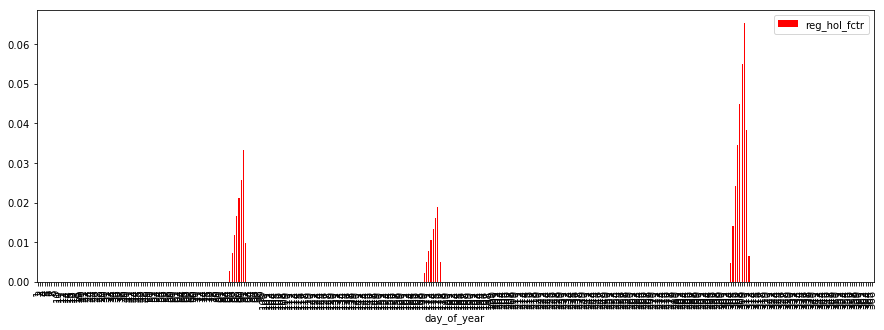

In [579]:
group=holidays.groupby(['day_of_year'],as_index=False)
reg_hol_factor_viz=pd.DataFrame(group['reg_hol_fctr'].agg('mean'))
reg_hol_factor_viz=reg_hol_factor_viz.sort_values(by='day_of_year')
pd.DataFrame.head(reg_hol_factor_viz)
reg_hol_factor_viz.plot('day_of_year','reg_hol_fctr',kind='bar', color='r', figsize=(15,5))

#### 3) Local Holidays
For this we are going to replicate what we did for regional holidays

In [580]:
holidays['loc_hol_fctr']=np.where(holidays.description_local_hol!="nan",1,0)
holidays['loc_hol_fctr_w']=0
holidays.loc_hol_fctr_w=holidays.loc_hol_fctr_w.values.astype('float64')
holidays['loc_hol_date']=np.where(holidays.description_local_hol!="nan",holidays.date,None)
holidays.loc_hol_date=pd.to_datetime(holidays.loc_hol_date)
holidays.loc_hol_date=holidays.loc_hol_date.values.astype('datetime64[D]')
pd.DataFrame.head(holidays)

,date,store_nbr,description,locale,description_regional_hol,locale_regional,description_local_hol,locale_local,nat_hol_fctr,nat_hol_fctr_w,nat_hol_date,day_of_year,reg_hol_fctr,reg_hol_fctr_w,reg_hol_date,loc_hol_fctr,loc_hol_fctr_w,loc_hol_date
0,2014-04-01,1,nan,nan,nan,nan,nan,nan,0.0,0.0,NaT,91,0.0,0.0,NaT,0,0.0,NaT
164,2014-04-01,2,nan,nan,nan,nan,nan,nan,0.0,0.0,NaT,91,0.0,0.0,NaT,0,0.0,NaT
332,2014-04-01,3,nan,nan,nan,nan,nan,nan,0.0,0.0,NaT,91,0.0,0.0,NaT,0,0.0,NaT
505,2014-04-01,4,nan,nan,nan,nan,nan,nan,0.0,0.0,NaT,91,0.0,0.0,NaT,0,0.0,NaT
674,2014-04-01,5,nan,nan,nan,nan,nan,nan,0.0,0.0,NaT,91,0.0,0.0,NaT,0,0.0,NaT


In [581]:
#get the list of stores that have local holidays
loc_hol_stores=holidays[holidays.description_local_hol!='nan']['store_nbr'].unique()
print(loc_hol_stores)

['37' '39' '36' '14' '19' '12' '13' '40' '41' '5' '16' '54' '11' '24' '26'
 '28' '30' '32' '34' '51' '43' '23' '50' '15' '33' '1' '2' '3' '4' '6' '7'
 '8' '9' '10' '17' '18' '44' '45' '46' '47' '48' '49' '38' '25' '53' '29'
 '20' '42' '22' '21']


In [586]:
for s in loc_hol_stores:
    loc_hol_store=holidays[holidays.store_nbr==s]
    
    loc_hol_dates=loc_hol_store['loc_hol_date'].values.astype('datetime64[D]')
    
    loc_hol_dates=np.unique(loc_hol_dates)
    
    dates=loc_hol_store['date'].values.astype('datetime64[D]')
    
    for i in range(len(dates)):
        for y in range(len(loc_hol_dates)-1,0,-1):
            if 0<((loc_hol_dates[y]-dates[i])/np.timedelta64(1,'D'))<=7:
                loc_hol_store.iloc[i,16]=1/7*(7-((loc_hol_dates[y]-dates[i])/np.timedelta64(1,'D')))
                idx=holidays[(holidays.store_nbr==s)].iloc[i].name
                holidays.loc[idx]=loc_hol_store.iloc[i]

C:\Users\laura.varsandan\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:216: FutureWarning: In the future, NAT != NAT will be True rather than False.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
C:\Users\laura.varsandan\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [587]:
print(holidays['loc_hol_fctr_w'].value_counts(normalize=True,dropna=False))
print(loc_hol_store['loc_hol_fctr_w'].value_counts(normalize=True,dropna=False))

0.000000    0.981219
0.857143    0.004145
0.428571    0.002933
0.714286    0.002933
0.285714    0.002933
0.571429    0.002918
0.142857    0.002918
Name: loc_hol_fctr_w, dtype: float64
0.000000    0.984064
0.428571    0.002656
0.571429    0.002656
0.857143    0.002656
0.142857    0.002656
0.714286    0.002656
0.285714    0.002656
Name: loc_hol_fctr_w, dtype: float64


In [588]:
holidays['loc_hol_fctr']=holidays['loc_hol_fctr']+holidays['loc_hol_fctr_w']

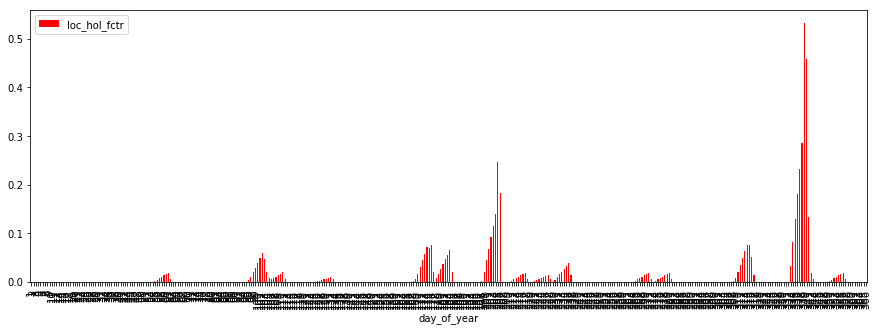

In [589]:
group=holidays.groupby(['day_of_year'],as_index=False)
loc_hol_factor_viz=pd.DataFrame(group['loc_hol_fctr'].agg('mean'))
loc_hol_factor_viz=loc_hol_factor_viz.sort_values(by='day_of_year')
pd.DataFrame.head(loc_hol_factor_viz)
loc_hol_factor_viz.plot('day_of_year','loc_hol_fctr',kind='bar', color='r', figsize=(15,5))

In [590]:
holidays_features=holidays[['date','store_nbr','nat_hol_fctr','reg_hol_fctr','loc_hol_fctr']]
pd.DataFrame.head(holidays_features)

,date,store_nbr,nat_hol_fctr,reg_hol_fctr,loc_hol_fctr
0,2014-04-01,1,0.0,0.0,0.0
164,2014-04-01,2,0.0,0.0,0.0
332,2014-04-01,3,0.0,0.0,0.0
505,2014-04-01,4,0.0,0.0,0.0
674,2014-04-01,5,0.0,0.0,0.0


In [591]:
# save the results
holidays_features.to_csv('holidays_features.csv',sep=',')

## Oil Price Feature

Oil Price is unlikely to have an imediate impact day by day. I suspect that the effect is more lagged, but we need to look at the data to see how much lag it would have

In [592]:
pd.DataFrame.head(class_merged_hol)

,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items,items_onpromotion,dcoilwtico,city,...,type,cluster,transactions,description,locale,description_regional_hol,locale_regional,description_local_hol,locale_local,sales_per_unit
0,2014-04-01,1,1002,GROCERY I,14.0,7.0,0.0,0.0,99.69,Quito,...,D,13,1847.0,nan,nan,nan,nan,nan,nan,2.000000
1,2014-04-01,1,1003,GROCERY I,2.0,1.0,0.0,0.0,99.69,Quito,...,D,13,1847.0,nan,nan,nan,nan,nan,nan,2.000000
2,2014-04-01,1,1004,GROCERY I,88.0,17.0,0.0,0.0,99.69,Quito,...,D,13,1847.0,nan,nan,nan,nan,nan,nan,5.176471
3,2014-04-01,1,1006,GROCERY I,4.0,2.0,0.0,0.0,99.69,Quito,...,D,13,1847.0,nan,nan,nan,nan,nan,nan,2.000000
4,2014-04-01,1,1008,GROCERY I,3.0,1.0,0.0,0.0,99.69,Quito,...,D,13,1847.0,nan,nan,nan,nan,nan,nan,3.000000


Let's look how it varies with the number of unit sales per day

In [593]:
group=class_merged_hol.groupby(['date','dcoilwtico'],as_index=False)
oil=pd.DataFrame(group['sum_unit_sales'].agg('sum'))
oil=oil.sort_values(by='date')
pd.DataFrame.head(oil)
#loc_hol_factor_viz.plot('day_of_year','loc_hol_fctr',kind='bar', color='r', figsize=(15,5))

,date,dcoilwtico,sum_unit_sales
0,2014-04-01,99.690000,485078.8870
1,2014-04-02,99.600000,463917.3160
2,2014-04-03,100.290000,388867.9614
3,2014-04-04,101.160000,422578.7449
4,2014-04-05,100.916667,617680.1940


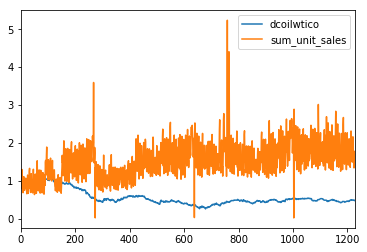

In [599]:
oil_base=oil['dcoilwtico'].iloc[0]
sales_base=oil['sum_unit_sales'].iloc[0]
oil['dcoilwtico']=oil['dcoilwtico']/oil_base
oil['sum_unit_sales']=oil['sum_unit_sales']/sales_base
pd.DataFrame.head(oil)

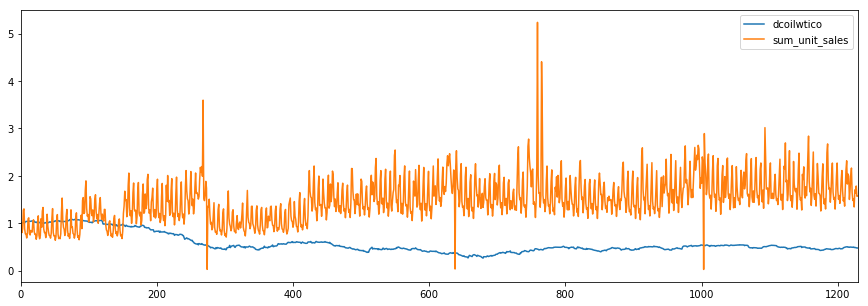

In [600]:
oil.plot(figsize=(15,5))

In [601]:
np.corrcoef(oil['dcoilwtico'],oil['sum_unit_sales'])

array([[ 1.        , -0.41299433],
       [-0.41299433,  1.        ]])

The correlation is negative, which is clearly counter intuitive. If the oil price goes down, the uni sale shiould also go down. So Let's try to let the effect of the oil factor. 

In order to see macro trends better, let's aggregate everything at month level. 

In [604]:
#calculate the average monthly oil price
group=class_merged_hol.groupby(['date','dcoilwtico'],as_index=False)
oil=pd.DataFrame(group['sum_unit_sales'].agg('sum'))
oil['month_year']=100*oil['date'].dt.year+oil['date'].dt.month
group=oil.groupby(['month_year'],as_index=False)
oil_monthly_price=pd.DataFrame(group['dcoilwtico'].agg('mean'))
oil_monthly_price=oil_monthly_price.sort_values(by='month_year')
pd.DataFrame.head(oil_monthly_price)

,month_year,dcoilwtico
0,201404,102.259000
1,201405,102.257903
2,201406,105.853000
3,201407,103.731129
4,201408,96.575323


In [605]:
#calculate the monthly sales
group=oil.groupby(['month_year'],as_index=False)
monthly_sales=pd.DataFrame(group['sum_unit_sales'].agg('sum'))
monthly_sales=monthly_sales.sort_values(by='month_year')
pd.DataFrame.head(monthly_sales)

,month_year,sum_unit_sales
0,201404,1.286125e+07
1,201405,1.337978e+07
2,201406,1.331995e+07
3,201407,1.942189e+07
4,201408,1.388515e+07


In [607]:
monthly=pd.merge(oil_monthly_price,monthly_sales,on='month_year',how='left')
pd.DataFrame.head(monthly)

,month_year,dcoilwtico,sum_unit_sales
0,201404,102.259000,1.286125e+07
1,201405,102.257903,1.337978e+07
2,201406,105.853000,1.331995e+07
3,201407,103.731129,1.942189e+07
4,201408,96.575323,1.388515e+07


In [648]:
# create a variable that captures the previous month's oil price for each line
monthly['previous_month_dcoilwtico']=0.0
for i in range(len(monthly.month_year)):
    if i in [0]:
        monthly.iloc[i,3]=monthly.iloc[i,1]
    else:
        monthly.iloc[i,3]=monthly.iloc[i-1,1]

In [649]:
pd.DataFrame.head(monthly)

,month_year,dcoilwtico,sum_unit_sales,previous_month_dcoilwtico
0,201404,102.259000,1.286125e+07,102.259000
1,201405,102.257903,1.337978e+07,102.259000
2,201406,105.853000,1.331995e+07,102.257903
3,201407,103.731129,1.942189e+07,105.853000
4,201408,96.575323,1.388515e+07,103.731129


In [647]:
np.corrcoef(monthly['previous_month_dcoilwtico'].iloc[20:],monthly['sum_unit_sales'].iloc[20:])

array([[ 1.        , -0.02041956],
       [-0.02041956,  1.        ]])

The correlation coefficient doens't seem to improve even if we lag it. Let's look again at how the 2 variables fluctuate by month

In [634]:
month_index=monthly[['month_year','dcoilwtico','sum_unit_sales']]
oil_base=month_index['dcoilwtico'].iloc[0]
sales_base=month_index['sum_unit_sales'].iloc[0]
month_index['dcoilwtico']=month_index['dcoilwtico']/oil_base
month_index['sum_unit_sales']=month_index['sum_unit_sales']/sales_base
pd.DataFrame.head(month_index)

C:\Users\laura.varsandan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\laura.varsandan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,month_year,dcoilwtico,sum_unit_sales
0,201404,1.000000,1.000000
1,201405,0.999989,1.040317
2,201406,1.035146,1.035665
3,201407,1.014396,1.510109
4,201408,0.944419,1.079611


C:\Users\laura.varsandan\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


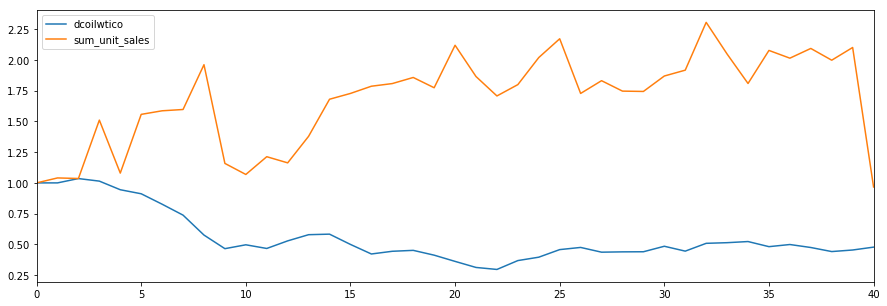

In [637]:
month_index.month_year=month_index.month_year.astype(str)
month_index.plot(figsize=(15,5))

In [639]:
np.corrcoef(month_index['dcoilwtico'],month_index['sum_unit_sales'])

array([[ 1.        , -0.56268382],
       [-0.56268382,  1.        ]])

In [643]:
np.corrcoef(month_index['dcoilwtico'].iloc[20:],month_index['sum_unit_sales'].iloc[20:])

array([[ 1.        ,  0.10141346],
       [ 0.10141346,  1.        ]])

In [642]:
month_index['dcoilwtico'].iloc[20:]

20    0.362152
21    0.312947
22    0.296723
23    0.368803
24    0.396333
25    0.457904
26    0.475570
27    0.437004
28    0.439627
29    0.440447
30    0.485163
31    0.445529
32    0.508950
33    0.514159
34    0.523424
35    0.481860
36    0.499270
37    0.475013
38    0.442008
39    0.454684
40    0.478048
Name: dcoilwtico, dtype: float64

Intuitively, the correlation between the behaviour of oil price and unit sales doesn't make sense, not even if we lag it. Therefore we will leave oil price outside the ecuation and come back to it later if we feel the need. 

Let's assume that oil price has at least one month of lag. 

In [650]:
#save the results
monthly.to_csv('oil_price_monthly_average.csv',sep=',')

## Creating Variable for the Earthquake that happened on the 16

The following information is given on the Kaggle Website: "A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake."

Let's add in an earthquake factor that has 1 on the 16th April 2016 and decreasing to 0 on 16th May 2016. 

In [659]:
pd.DataFrame.head(class_merged_hol)

,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items,items_onpromotion,dcoilwtico,city,...,type,cluster,transactions,description,locale,description_regional_hol,locale_regional,description_local_hol,locale_local,sales_per_unit
0,2014-04-01,1,1002,GROCERY I,14.0,7.0,0.0,0.0,99.69,Quito,...,D,13,1847.0,nan,nan,nan,nan,nan,nan,2.000000
1,2014-04-01,1,1003,GROCERY I,2.0,1.0,0.0,0.0,99.69,Quito,...,D,13,1847.0,nan,nan,nan,nan,nan,nan,2.000000
2,2014-04-01,1,1004,GROCERY I,88.0,17.0,0.0,0.0,99.69,Quito,...,D,13,1847.0,nan,nan,nan,nan,nan,nan,5.176471
3,2014-04-01,1,1006,GROCERY I,4.0,2.0,0.0,0.0,99.69,Quito,...,D,13,1847.0,nan,nan,nan,nan,nan,nan,2.000000
4,2014-04-01,1,1008,GROCERY I,3.0,1.0,0.0,0.0,99.69,Quito,...,D,13,1847.0,nan,nan,nan,nan,nan,nan,3.000000


In [702]:
dates=pd.DataFrame(class_merged_hol['date'].unique())
pd.DataFrame.head(dates)

,0
0,2014-04-01
1,2014-04-02
2,2014-04-03
3,2014-04-04
4,2014-04-05


In [703]:
dates.columns=['date']
pd.DataFrame.head(dates)

,date
0,2014-04-01
1,2014-04-02
2,2014-04-03
3,2014-04-04
4,2014-04-05


In [704]:
dates['earth_fctr']=np.where(dates.date=='2016-04-16',1,0.0)

In [705]:
pd.DataFrame.head(dates)

,date,earth_fctr
0,2014-04-01,0.0
1,2014-04-02,0.0
2,2014-04-03,0.0
3,2014-04-04,0.0
4,2014-04-05,0.0


In [706]:
dates['eathq_date']='2016-04-16'

In [707]:
dates['date']=dates['date'].values.astype('datetime64[D]')
dates['eathq_date']=dates['eathq_date'].values.astype('datetime64[D]')

In [708]:
pd.DataFrame.head(dates)

,date,earth_fctr,eathq_date
0,2014-04-01,0.0,2016-04-16
1,2014-04-02,0.0,2016-04-16
2,2014-04-03,0.0,2016-04-16
3,2014-04-04,0.0,2016-04-16
4,2014-04-05,0.0,2016-04-16


In [709]:
dates['earth_fctr_w']=0.0
dates['diff']=(dates.date-dates.eathq_date)/np.timedelta64(1,'D')
dates['diff']=dates['diff'].values.astype('int64')
pd.DataFrame.head(dates)

,date,earth_fctr,eathq_date,earth_fctr_w,diff
0,2014-04-01,0.0,2016-04-16,0.0,-746
1,2014-04-02,0.0,2016-04-16,0.0,-745
2,2014-04-03,0.0,2016-04-16,0.0,-744
3,2014-04-04,0.0,2016-04-16,0.0,-743
4,2014-04-05,0.0,2016-04-16,0.0,-742


In [712]:
dates.dtypes

date            datetime64[ns]
earth_fctr             float64
eathq_date      datetime64[ns]
earth_fctr_w           float64
diff                     int64
dtype: object

In [728]:
earthq_Dates=dates[(dates['diff']>=0)&(dates['diff']<=30)]
earthq_Dates['earth_fctr_w_new']=1/30*(30-earthq_Dates['diff'])

C:\Users\laura.varsandan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [731]:
earthq_Dates['earth_fctr']=earthq_Dates['earth_fctr_w_new']

C:\Users\laura.varsandan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [732]:
earthq_Dates

,date,earth_fctr,eathq_date,earth_fctr_w,diff,earth_fctr_w_new
744,2016-04-16,1.000000,2016-04-16,0.0,0,1.000000
745,2016-04-17,0.966667,2016-04-16,0.0,1,0.966667
746,2016-04-18,0.933333,2016-04-16,0.0,2,0.933333
747,2016-04-19,0.900000,2016-04-16,0.0,3,0.900000
748,2016-04-20,0.866667,2016-04-16,0.0,4,0.866667
749,2016-04-21,0.833333,2016-04-16,0.0,5,0.833333
750,2016-04-22,0.800000,2016-04-16,0.0,6,0.800000
751,2016-04-23,0.766667,2016-04-16,0.0,7,0.766667
752,2016-04-24,0.733333,2016-04-16,0.0,8,0.733333
753,2016-04-25,0.700000,2016-04-16,0.0,9,0.700000


In [734]:
earthq_Dates=earthq_Dates[['date','earth_fctr']]

In [735]:
#save_results
earthq_Dates.to_csv('earthq_Dates.csv',sep=',')

## Merge the new features with the original dataset

In [738]:
#1) earthq_Dates
class_merged_hol_new_features=pd.merge(class_merged_hol,earthq_Dates, on='date', how='left')
pd.DataFrame.head(class_merged_hol_new_features)

,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items,items_onpromotion,dcoilwtico,city,...,cluster,transactions,description,locale,description_regional_hol,locale_regional,description_local_hol,locale_local,sales_per_unit,earth_fctr
0,2014-04-01,1,1002,GROCERY I,14.0,7.0,0.0,0.0,99.69,Quito,...,13,1847.0,nan,nan,nan,nan,nan,nan,2.000000,NaN
1,2014-04-01,1,1003,GROCERY I,2.0,1.0,0.0,0.0,99.69,Quito,...,13,1847.0,nan,nan,nan,nan,nan,nan,2.000000,NaN
2,2014-04-01,1,1004,GROCERY I,88.0,17.0,0.0,0.0,99.69,Quito,...,13,1847.0,nan,nan,nan,nan,nan,nan,5.176471,NaN
3,2014-04-01,1,1006,GROCERY I,4.0,2.0,0.0,0.0,99.69,Quito,...,13,1847.0,nan,nan,nan,nan,nan,nan,2.000000,NaN
4,2014-04-01,1,1008,GROCERY I,3.0,1.0,0.0,0.0,99.69,Quito,...,13,1847.0,nan,nan,nan,nan,nan,nan,3.000000,NaN


In [739]:
#save_results
class_merged_hol_new_features.to_csv('class_merged_hol_new_features.csv',sep=',')

In [ ]:
#1) earthq_Dates
class_merged_hol_new_features=pd.merge(class_merged_hol,earthq_Dates, on='date', how='left')
pd.DataFrame.head(class_merged_hol_new_features)